In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("algerian_forest_fire_cleanned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.shape

(243, 15)

In [5]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)
df.Classes.value_counts(normalize=True)*100

1    56.378601
0    43.621399
Name: Classes, dtype: float64

In [9]:
X=df.drop("FWI",axis=1)
y=df["FWI"]

In [10]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [13]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [14]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.641786,-0.301788,-0.351886,0.692876,0.484204,0.380831,0.623761,0.460204,0.536301,0.291885
RH,-0.641786,1.000000,0.283841,0.260910,-0.664733,-0.424346,-0.241217,-0.702719,-0.370308,-0.439744,-0.427907
Ws,-0.301788,0.283841,1.000000,0.203961,-0.180695,0.003779,0.075366,-0.010963,0.029821,-0.076006,-0.165058
Rain,-0.351886,0.260910,0.203961,1.000000,-0.559936,-0.297328,-0.310146,-0.354747,-0.308438,-0.382319,-0.076968
FFMC,0.692876,-0.664733,-0.180695,-0.559936,1.000000,0.620855,0.537230,0.756232,0.610643,0.781529,0.267158
DMC,0.484204,-0.424346,0.003779,-0.297328,0.620855,1.000000,0.875589,0.708029,0.984417,0.618745,0.246749
DC,0.380831,-0.241217,0.075366,-0.310146,0.537230,0.875589,1.000000,0.554480,0.945145,0.550830,-0.050241
ISI,0.623761,-0.702719,-0.010963,-0.354747,0.756232,0.708029,0.554480,1.000000,0.671287,0.753338,0.319760
BUI,0.460204,-0.370308,0.029821,-0.308438,0.610643,0.984417,0.945145,0.671287,1.000000,0.613246,0.145472
Classes,0.536301,-0.439744,-0.076006,-0.382319,0.781529,0.618745,0.550830,0.753338,0.613246,1.000000,0.231666


In [15]:
# checking for multi co-linearity

def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [17]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)

In [18]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
156,34,45,18,0.0,90.5,18.7,11.3,1,1
139,33,62,10,8.7,65.5,4.6,0.9,0,1
157,35,42,15,0.3,84.7,15.5,4.3,1,1
11,26,81,19,0.0,84.0,13.8,4.8,1,0
15,29,89,13,0.7,36.1,1.7,0.0,0,0


In [19]:
X_test.drop(corr_features,axis=1,inplace=True)

In [20]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

# Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 0.53191256, -1.13694773,  0.84754557, ...,  1.55784323,
         0.91563303,  1.        ],
       [ 0.26225215, -0.00730217, -1.85273092, ..., -0.89551035,
        -1.0921406 ,  1.        ],
       [ 0.80157297, -1.33629695, -0.16505811, ..., -0.09345245,
         0.91563303,  1.        ],
       ...,
       [-0.00740825,  0.457846  ,  0.17247645, ...,  0.18962681,
         0.91563303, -1.        ],
       [-0.27706866,  0.12559731, -0.16505811, ...,  0.23680669,
         0.91563303, -1.        ],
       [-1.89503111,  1.72039104, -0.84012723, ..., -1.01346004,
        -1.0921406 , -1.        ]])

# box plots to understand effect of standard error

/tmp/ipykernel_1107/3658919594.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'after scaling')

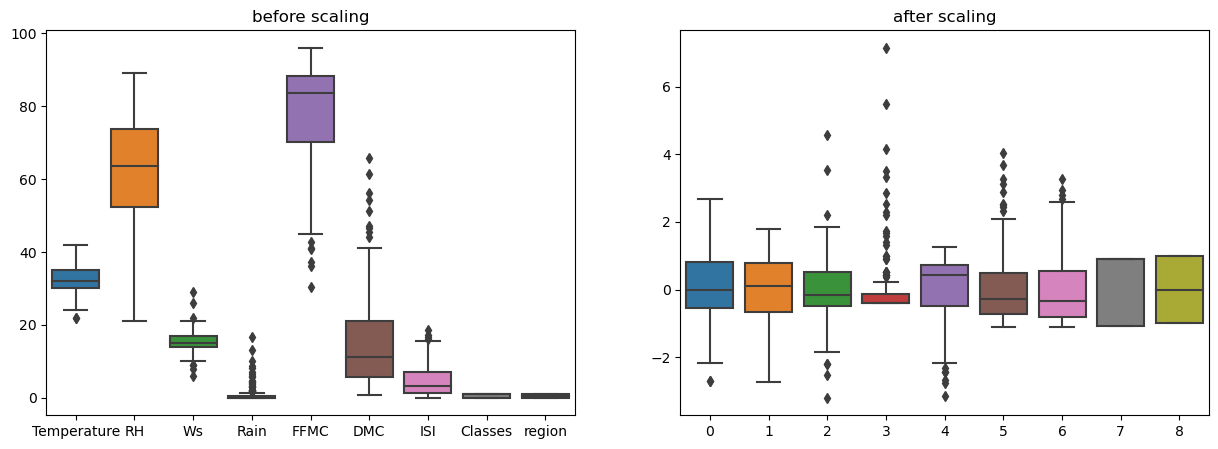

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("after scaling")

# linear regression model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

0.7961708795889496 0.9013327634021251


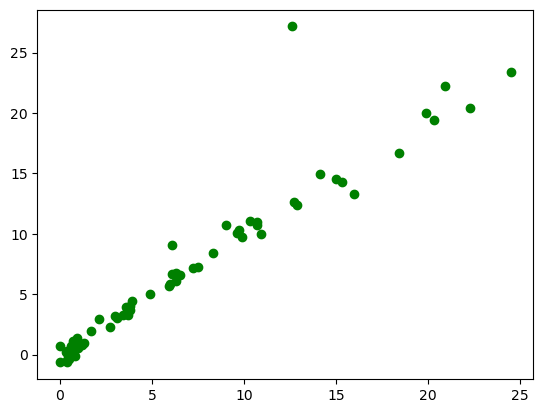

In [26]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)
plt.scatter(y_test,y_pred,color="green")

# Lasso regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

1.2976720140729159 0.9012366429956526


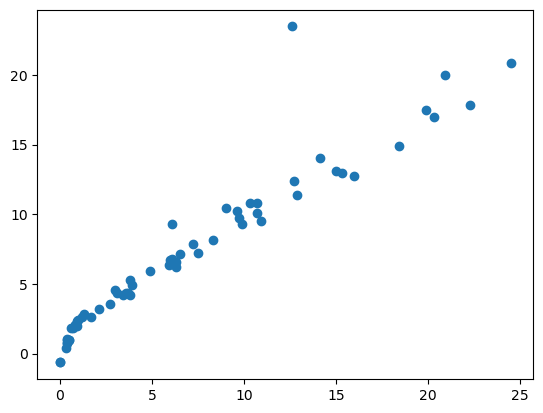

In [28]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)
plt.scatter(y_test,y_pred)

# cross validation lasso

In [29]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

(0.7817090718011903, 0.9035560591262409)

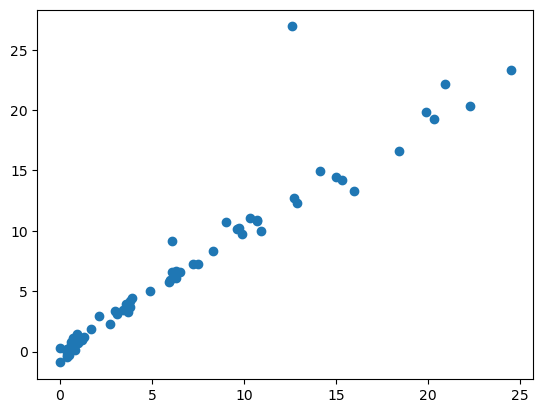

In [30]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mae,score

# ridge

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ridge=Ridge()


In [32]:
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

(4.018290373845089, 0.9043960845958501)

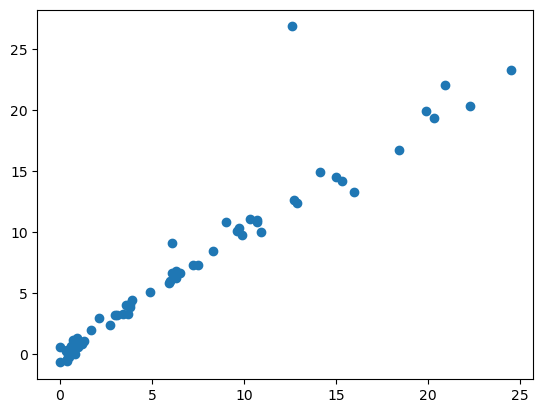

In [33]:
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
mse,score

# cross validation ridge

In [34]:
from sklearn.linear_model import RidgeCV

In [35]:
ridgecv=RidgeCV(cv=5)

In [36]:
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

(4.133285057220396, 0.9016601096018828)

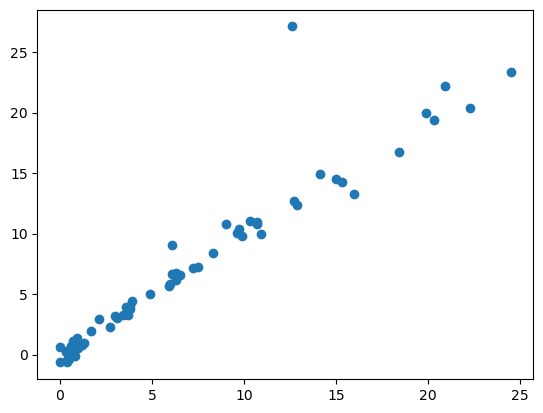

In [37]:
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mse,score

In [38]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# elastic net regression 

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [40]:
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)


(1.8706812744930221, 0.8690493962861191)

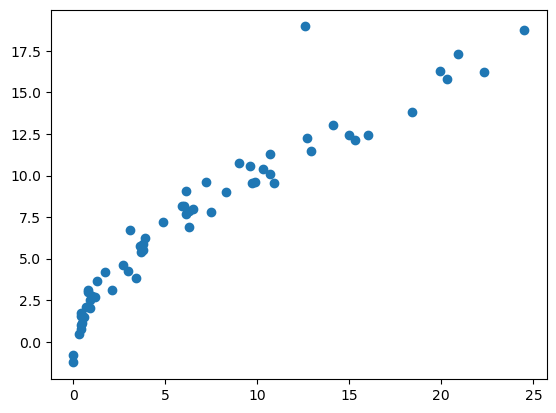

In [41]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
mae,score

# ElasticNetCv

In [42]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)


In [43]:
elasticcv.fit(X_train_scaled,y_train)

ElasticNetCV(cv=5)

(0.7825343784476129, 0.905756846361612)

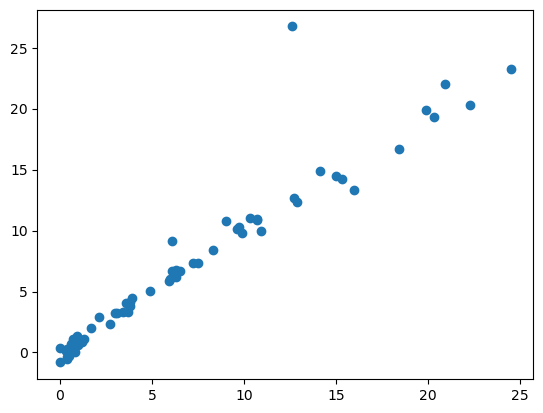

In [44]:
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mae,score

In [45]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

# pickle the machine learning model, preprocessing standard scaler

In [46]:
scaler

StandardScaler()

In [48]:
elasticcv

ElasticNetCV(cv=5)

In [49]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(elasticcv,open("elasticcv.pkl","wb"))